In [89]:
#creating the graph etc
import numpy as np
import networkx as nx
import matplotlib.pylab as plt
import pandas as pd
from scipy import stats, integrate
#import plotly
import sklearn.cluster as cluster

%matplotlib inline


#assuming the importation of data as pandas data frames before here

#====begin making graph/network====


dfP=pd.read_csv('./data/final.csv', index_col=0)
dfP.rename(columns={'Category':'crimeCount'}, inplace=True)




/Users/bradygerndt/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
#Making networks
from networkx.algorithms import bipartite
teamsGraph=nx.Graph()
teams=dfP.team.unique()


for i in teams:
	teamsGraph.add_node(i,team=1,bipartite=0,crimes=-1) #team name

names=dfP.name.unique()	



for name in names:#number of players
  
    nameTemp=dfP[(dfP.name==name)]

    playerCrimes=nameTemp.crimeCount.unique()
  
    crimee=0
    for crim in playerCrimes:
        if crim==1:
            crimee=1
    teamsGraph.add_node(name,crimes=crimee, bipartite=1)
    
    playerTeams=nameTemp.team.unique()
    for team in playerTeams:
        teamsGraph.add_edge(team,name)

		
    


In [3]:
#Actual network analysis


interestNodes=[n for n,m in teamsGraph.nodes(data=True) if (m['bipartite']==0 or m['crimes']==1)]
crimeNodes=[n for n,m in teamsGraph.nodes(data=True) if (m['crimes']==1)]
notCrimeNodes=[n for n,m in teamsGraph.nodes(data=True) if (m['crimes']==0)]

teamNodes=[n for n,m in teamsGraph.nodes(data=True) if (m['crimes']==-1)]
listOfEdges = [edge for edge in teamsGraph.edges()]

## see https://stackoverflow.com/questions/16910538/efficient-extraction-of-a-subgraph-according-to-some-edge-attribute-in-networkx
crimeNet=teamsGraph.subgraph(interestNodes)
crimeEdges= [edge for edge in crimeNet.edges()]
#
#
##cool network analysis 
C=nx.clustering(crimeNet)
B=nx.betweenness_centrality(crimeNet)
crAdjMat=crimeNetAdjMat = nx.adjacency_matrix(crimeNet)
#
#ax(B[ x)
import operator
maxBet=max(B.items(), key=operator.itemgetter(1))[0]
minBet=min(B.items(), key=operator.itemgetter(1))[0]





In [ ]:
pos = nx.spring_layout(crimeNet)
nx.draw_networkx_nodes(crimeNet, pos, nodelist=crimeNodes, cmap=plt.get_cmap('jet'), node_color = 'r',node_size=10)
nx.draw_networkx_nodes(crimeNet, pos, nodelist=teamNodes, cmap=plt.get_cmap('jet'),node_color = 'g',node_size=10)

nx.draw_networkx_edges(crimeNet, pos, edgelist=crimeEdges, arrows=False)

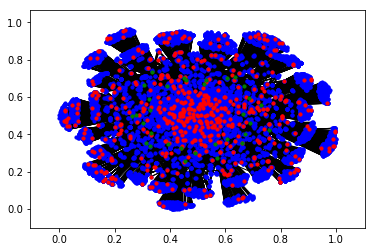

In [4]:
pos = nx.spring_layout(teamsGraph)
nx.draw_networkx_nodes(teamsGraph, pos, nodelist=notCrimeNodes, cmap=plt.get_cmap('jet'), node_color = 'b',node_size=10)
nx.draw_networkx_nodes(teamsGraph, pos, nodelist=crimeNodes, cmap=plt.get_cmap('jet'), node_color = 'r',node_size=10)
nx.draw_networkx_nodes(teamsGraph, pos, nodelist=teamNodes, cmap=plt.get_cmap('jet'),node_color = 'g',node_size=10)
#nx.draw_networkx_labels(teamsGraph, pos)
nx.draw_networkx_edges(teamsGraph, pos, edgelist=listOfEdges, arrows=False)
#plt.figure(figsize=)
#plt.savefig("fullNet.png", dpi=1000)
#plt.savefig("fullNet.pdf")
plt.show()


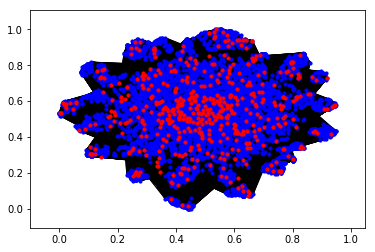

In [6]:
pos = nx.spring_layout(uniTeamsGraph)
nx.draw_networkx_nodes(uniTeamsGraph, pos, nodelist=notCrimeNodes, cmap=plt.get_cmap('jet'), node_color = 'b',node_size=10)
nx.draw_networkx_nodes(uniTeamsGraph, pos, nodelist=crimeNodes, cmap=plt.get_cmap('jet'), node_color = 'r',node_size=10)
nx.draw_networkx_edges(uniTeamsGraph, pos, edgelist=uniEdges, arrows=False)


In [4]:
playerNodes = (notCrimeNodes + crimeNodes)

uniTeamsGraph = bipartite.projected_graph(teamsGraph, playerNodes)

uniEdges = uniTeamsGraph.edges()



/Users/bradygerndt/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/bradygerndt/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/bradygerndt/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/bradygerndt/anaconda/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnin

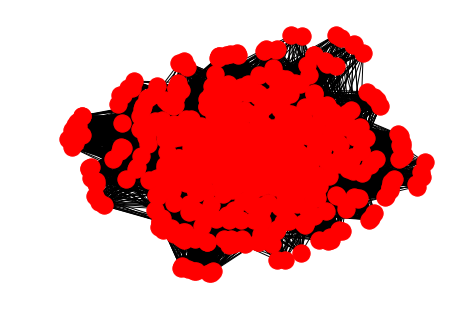

In [7]:
uniCrimesGraph = bipartite.projected_graph(crimeNet, crimeNodes)
uniCrimeEdges = uniCrimesGraph.edges()
nx.draw(uniCrimesGraph)



In [5]:
crimeGraph=nx.Graph()
crimeList = ['Alcohol','Animal Abuse','Assault / Battery', 'DUI','Disorderly conduct','Domestic Violence','Drugs','Gun','License / Traffic','Murder / Manslaughter','Resisting','Sex','Other','Theft / Burglary']

for i in crimeList:
    crimeGraph.add_node(i,issaCrime=1)
    
dfC = dfP[(dfP.crimeCount >= 1)]

for i in dfC.name.unique():
    crimeGraph.add_node(i, issaCrime=0)


def createCrimeNodes(i, row):
    for crime in crimeList:
        if row[crime] >= 1:
            crimeGraph.add_edge(crime, row['name'])
[createCrimeNodes(i, row) for i, row in dfC.iterrows()]

# print(dict([n for n, m in crimeGraph.nodes(data=True) if (m['issaCrime']==1)]))
labels = dict((key, key) for (key, value) in crimeGraph.nodes(data=True) if (value['issaCrime']==1))

crimeNodes =[n for n,m in crimeGraph.nodes(data=True) if (m['issaCrime']==1)]
playNodes =[n for n,m in crimeGraph.nodes(data=True) if (m['issaCrime']==0)]
listOfCrimeEdges= [edge for edge in crimeGraph.edges()]


{'Alcohol': <matplotlib.text.Text at 0x1b7f18cf8>,
 'Animal Abuse': <matplotlib.text.Text at 0x1b800f400>,
 'Assault / Battery': <matplotlib.text.Text at 0x1b800f9b0>,
 'DUI': <matplotlib.text.Text at 0x1b800fe80>,
 'Disorderly conduct': <matplotlib.text.Text at 0x1b8008400>,
 'Domestic Violence': <matplotlib.text.Text at 0x1b8008940>,
 'Drugs': <matplotlib.text.Text at 0x1b8008e80>,
 'Gun': <matplotlib.text.Text at 0x1b8003400>,
 'License / Traffic': <matplotlib.text.Text at 0x1b8003940>,
 'Murder / Manslaughter': <matplotlib.text.Text at 0x1b8003e80>,
 'Other': <matplotlib.text.Text at 0x1b7ffae80>,
 'Resisting': <matplotlib.text.Text at 0x1b7ffa400>,
 'Sex': <matplotlib.text.Text at 0x1b7ffa940>,
 'Theft / Burglary': <matplotlib.text.Text at 0x1b7ff1400>}

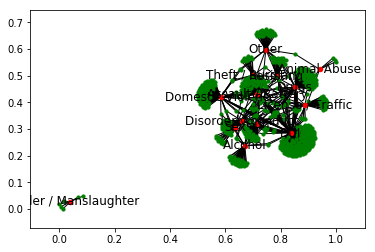

In [9]:
#printing graph that links players crimes to the crimes

pos = nx.spring_layout(crimeGraph)
nx.draw_networkx_nodes(crimeGraph, pos, nodelist=crimeNodes, cmap=plt.get_cmap('jet'), node_color = 'r',node_size=20)
nx.draw_networkx_nodes(crimeGraph, pos, nodelist=playNodes, cmap=plt.get_cmap('jet'),node_color = 'g',node_size=10)
nx.draw_networkx_edges(crimeGraph, pos, edgelist=listOfCrimeEdges, arrows=False)
nx.draw_networkx_labels(crimeGraph, pos, labels=labels)



[1, 2, 3, 4, 5, 6, 7, 21, 22, 23, 26, 27, 28, 30, 31, 33, 34, 35, 36, 37, 38, 40, 41, 43, 44, 47, 49, 50]


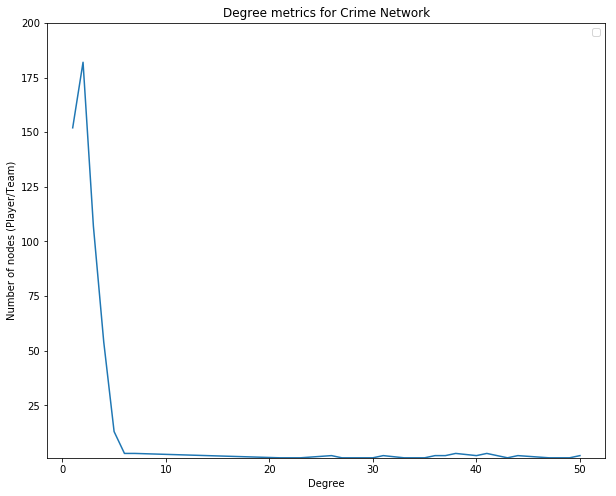

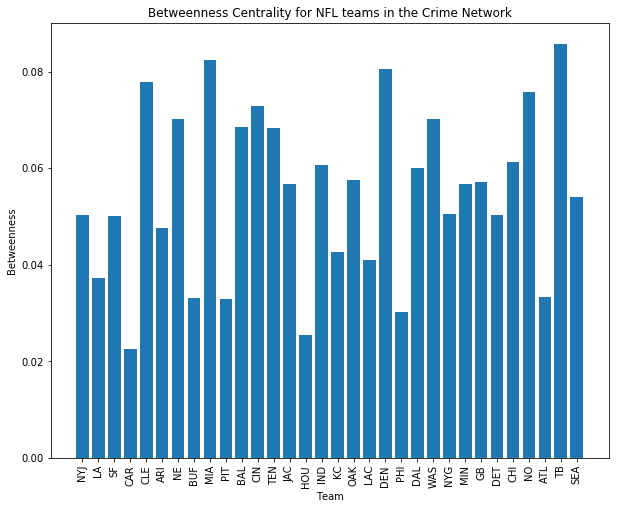

In [67]:
###Degree centrality graph within crime network
D = crimeNet.degree()
degrees = sorted(set(D.values()))
print(degrees)
degree_agg = [list(D.values()).count(x) for x in degrees]

plt.figure(figsize=(10,8))
plt.plot(degrees, degree_agg)

plt.legend('')
plt.ylabel('Number of nodes (Player/Team)')
plt.xlabel('Degree')
plt.ylim(1,200)

plt.title("Degree metrics for Crime Network")
plt.savefig("DegreeMet.png")



##Betweenness by teams
teamNodes = set(n for n,d in crimeNet.nodes(data=True) if d['bipartite']==0)

TB = bipartite.betweenness_centrality(crimeNet, teamNodes)

teamBetweenness = {}
for key in list((TB))[:32]:

    teamBetweenness[key] = TB[key]

plt.figure(figsize=(10,8))
plt.bar(range(len(teamBetweenness)), teamBetweenness.values())
plt.xticks(range(len(teamBetweenness)), teamBetweenness.keys(), rotation=90)
plt.title("Betweenness Centrality for NFL teams in the Crime Network")
plt.ylabel('Betweenness')
plt.xlabel("Team")
plt.savefig("BetweenMet.png")
plt.show()


In [92]:
##Metrics to add to data


##takes too long for the wholegraph
##closeness in one-mode graph
#cl = nx.closeness_centrality(uniTeamsGraph)
#bt = nx.betweenness_centrality(uniTeamsGraph)


##we'll go with team crime graph metrics

TC = bipartite.closeness_centrality(crimeNet, teamNodes)

teamCloseness = {}
for key in list((TC))[:32]:
    teamCloseness[key] = TC[key]
    
teamDegrees = {}
for key in list((D))[:32]:
    teamDegrees[key] = D[key]



teamBetweenness
teamCloseness
teamDegrees

[matchNetworkMeasures(team) for team in dfP.team.unique()]


def matchNetworkMeasures(team):
    dfP.loc[(dfP.team == team), 'Team_Degrees'] = teamDegrees[team]
    dfP.loc[(dfP.team == team), 'Team_Closeness'] = teamCloseness[team]
    dfP.loc[(dfP.team == team), 'Team_Betweenness'] = teamBetweenness[team]

#matchNetworkMeasures('NYJ')

#dfP.loc[(dfP.team == "NYJ"), ['Team_Degrees','Team_Closeness','Team_Betweenness']]

    
dfP.to_csv('./data/final_networked_by_team.csv', index=False)